<a href="https://colab.research.google.com/github/ary-10/arij.github.io/blob/main/MLP_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importation des librairies

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.optimizers import RMSprop
import numpy as np


In [ ]:
(x_train,y_train), (x_test, y_test)=mnist.load_data()
print('x_train:', x_train.shape,'train samples:', x_train.shape[0])
print('x_test:', x_test.shape,'test samples:', x_test.shape[0])
print('y_train:', x_test.shape,'y_test:', y_test.shape[0])

x_train: (60000, 28, 28) train samples: 60000
x_test: (10000, 28, 28) test samples: 10000
y_train: (10000, 28, 28) y_test: 10000


In [ ]:
x_train=x_train.reshape(60000,28*28)#(60000,784)
x_test=x_test.reshape(10000,28*28)#(10000,784)

In [ ]:
import keras
num_classes=10
y_train=keras.utils.to_categorical(y_train, num_classes)#(60000,10)
y_test=keras.utils.to_categorical(y_test , num_classes)#(60000,10)

In [ ]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")
x_train/=255
x_test/=255



In [ ]:
model=Sequential()
model.add(Dense(512, input_shape=(784,))) #couche cachée 1 a 512 neurones
model.add(Activation('relu'))
model.add(Dense(512))#couche cachee 2 a 512 neurones
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])


In [ ]:
epochs=20

batch_size=128
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

model.fit(x_train,y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.8529 - loss: 0.4670 - val_accuracy: 0.9681 - val_loss: 0.0997
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9701 - loss: 0.1009 - val_accuracy: 0.9770 - val_loss: 0.0716
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9808 - loss: 0.0629 - val_accuracy: 0.9799 - val_loss: 0.0700
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9855 - loss: 0.0453 - val_accuracy: 0.9798 - val_loss: 0.0689
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9889 - loss: 0.0345 - val_accuracy: 0.9797 - val_loss: 0.0754
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9923 - loss: 0.0241 - val_accuracy: 0.9826 - val_loss: 0.0663
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9938 - loss: 0.0200 - val_accuracy: 0.9833 - val_loss: 0.0654
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9948 - loss: 0.0159 - va

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print('test loss',score[0])
print('test accuracy',score[1])

test loss 0.09839111566543579
test accuracy 0.9840999841690063


In [ ]:
model_name='trained_MLP_MNIST_model.h5'
model.save(model_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
limage contient le choffre : 6


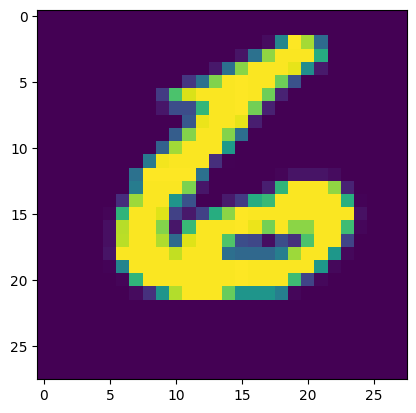

In [ ]:
#tester un echantillon de x_text
import matplotlib.pyplot as plt
nb_echantillon=9999
img_test=np.expand_dims(x_test[nb_echantillon],axis=0)
output=model.predict(img_test)
plt.imshow(img_test.reshape(28,28))
print('l''image contient le chiffre :',np.argmax(output))

Saving WhatsApp Image 2024-12-14 à 13.35.38_460dd0f0.jpg to WhatsApp Image 2024-12-14 à 13.35.38_460dd0f0 (6).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


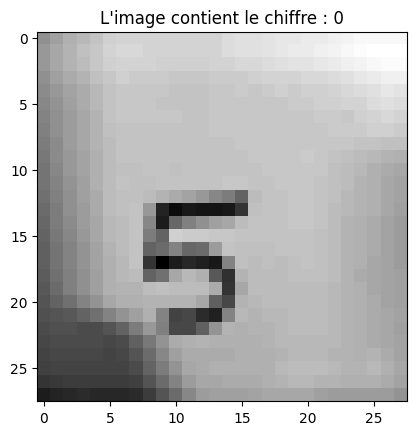

In [ ]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

# Step 1: Upload an image
model = load_model('trained_MLP_MNIST_model.h5')  # Replace 'trained_MLP_MNIST_model.h5' with the actual path

uploaded = files.upload()  # Select your image from local storage

# Step 2: Load and preprocess the image
image_path = list(uploaded.keys())[0]  # Get the uploaded image file name
img = Image.open(image_path).convert('L')  # Convert to grayscale (MNIST is grayscale)
img = img.resize((28, 28))  # Resize to 28x28 pixels

# Step 3: Normalize and flatten the image to match input shape
img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
img_array = img_array.reshape(1, 784)  # Reshape to (1, 784) to match model's input shape

# Step 4: Predict the digit
output = model.predict(img_array)
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f"L'image contient le chiffre : {np.argmax(output)}")
plt.show()



In [ ]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model  # Import load_model

# Load your trained model (if not already loaded)
model = load_model('trained_MLP_MNIST_model.h5')  # Replace 'trained_MLP_MNIST_model.h5' with the actual path

def predict_digit(img_path):
    """Predicts the digit in the given image using the loaded model.

    Args:
        img_path: The path to the image file.

    Returns:
        The predicted digit.
    """
    img = Image.open(img_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28
    img_array = np.array(img) / 255.0  # Normalize
    img_array = img_array.reshape(1, 784)  # Reshape
    output = model.predict(img_array)  # Predict
    predicted_digit = np.argmax(output)  # Get the digit with the highest probability
    return predicted_digit

# Step 1: Upload an image
uploaded = files.upload()  # Select your image from local storage

# Step 2: Get the image path and predict
image_path = list(uploaded.keys())[0]  # Get the uploaded image file name

# Step 3: Predict the digit and display results
predicted_digit = predict_digit(image_path)

# Step 4: Display the image and prediction
img = Image.open(image_path).convert('L')
img_array = np.array(img) / 255.0
img_array = img_array.reshape(784)
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f"L'image contient le chiffre : {predicted_digit}")
plt.show()

Saving WhatsApp Image 2024-12-14 à 13.35.38_460dd0f0.jpg to WhatsApp Image 2024-12-14 à 13.35.38_460dd0f0 (4).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


ValueError: cannot reshape array of size 1228800 into shape (784,)